In [1]:
import os
import cv2
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

def read_yolo_annotation(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    bboxes = []
    for line in lines:
        data = line.strip().split(' ')
        class_id, x_center, y_center, width, height = map(float, data)
        bboxes.append((class_id, x_center, y_center, width, height))

    return bboxes

def write_yolo_annotation(bboxes, output_path):
    with open(output_path, 'w') as file:
        for bbox in bboxes:
            line = ' '.join(map(str, bbox))
            file.write(line + '\n')

def yolo_to_imgaug_bbox(yolo_bbox, image_shape):
    class_id, x_center, y_center, width, height = yolo_bbox
    h, w, _ = image_shape
    x_min = (x_center - width / 2) * w
    y_min = (y_center - height / 2) * h
    x_max = (x_center + width / 2) * w
    y_max = (y_center + height / 2) * h

    return BoundingBox(x1=x_min, y1=y_min, x2=x_max, y2=y_max, label=class_id)

def imgaug_to_yolo_bbox(imgaug_bbox, image_shape):
    h, w, _ = image_shape
    x_min, y_min, x_max, y_max = imgaug_bbox.x1, imgaug_bbox.y1, imgaug_bbox.x2, imgaug_bbox.y2
    class_id = imgaug_bbox.label
    x_center = (x_min + x_max) / 2 / w
    y_center = (y_min + y_max) / 2 / h
    width = (x_max - x_min) / w
    height = (y_max - y_min) / h

    return (class_id, x_center, y_center, width, height)

def augment_yolo_image(image_path, annotation_path, output_image_path, output_annotation_path):
    # Read image and annotations
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    yolo_bboxes = read_yolo_annotation(annotation_path)

    # Convert YOLO bboxes to imgaug BoundingBoxesOnImage
    imgaug_bboxes = BoundingBoxesOnImage(
        [yolo_to_imgaug_bbox(yolo_bbox, image.shape) for yolo_bbox in yolo_bboxes],
        shape=image.shape
    )

    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.Affine(scale=(0.8, 1.2), translate_percent=(-0.1, 0.1), rotate=(-10, 10)),
        iaa.Multiply((0.8, 1.2))
    ])

    # Apply augmentation
    aug_image, aug_bboxes = seq(image=image, bounding_boxes=imgaug_bboxes)

    # Convert imgaug BoundingBoxesOnImage back to YOLO format
    aug_yolo_bboxes = [imgaug_to_yolo_bbox(aug_bbox, aug_image.shape) for aug_bbox in aug_bboxes]

    # Save augmented image and annotations
    aug_image = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_image_path, aug_image)
    write_yolo_annotation(aug_yolo_bboxes, output_annotation_path)

# Example usage
image_path = '/forest_3d_app/forest_3d_app/data/dataset/images/150_2-160_2_slam_slice_no_16.jpeg'
annotation_path = '/forest_3d_app/forest_3d_app/data/dataset/images/150_2-160_2_slam_slice_no_16.txt'
output_image_path = '/forest_3d_app/forest_3d_app/data/dataset/images/augmentation/images/150_2-160_2_slam_slice_no_161.jpeg'
output_annotation_path = '/forest_3d_app/forest_3d_app/data/dataset/images/augmentation/labels/150_2-160_2_slam_slice_no_161.txt'

augment_yolo_image(image_path, annotation_path, output_image_path, output_annotation_path)


ImportError: No module named 'imgaug'

In [13]:
import random



457529415539889344

In [34]:
import glob
import random

folder = "train"

images = glob.glob("/forest_3d_app/forest_3d_app/data/dataset/images/{}/*.jpeg".format(folder))
# print(images)
dataset_path = "/forest_3d_app/forest_3d_app/data/dataset/images/"
augmentation_dir = "/forest_3d_app/forest_3d_app/data/dataset/images/augmentation/{}/images/".format(folder)
augement_per_image = 10



for image_path in images:
    base_path = image_path.rsplit(".",1)[0]
    file_path = base_path.rsplit("/",1)[1]
    label_path = base_path + ".txt"
    
    
    for i in range(augement_per_image):
        random_number = int(random.random()*1000000000000000000)
        annoated_image_path = augmentation_dir + "{}_{}.jpeg".format(file_path, random_number)
        annotated_label_path = augmentation_dir + "{}_{}.txt".format(file_path, random_number)
        augment_yolo_image(image_path, label_path, annoated_image_path, annotated_label_path)
    
    

In [17]:
"{}_fd".format(123)

'123_fd'

# Plot Annotations

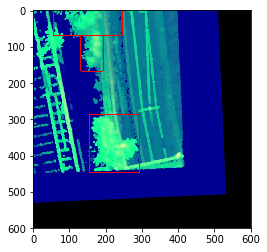

In [30]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_annotations(image_path, annotation_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read annotations
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        data = line.strip().split(' ')
        class_id, x_center, y_center, width, height = map(float, data)

        # Convert YOLO coordinates to OpenCV coordinates
        h, w, _ = image.shape
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # Draw bounding box on the image
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Display the image with annotations
    plt.imshow(image)
    plt.show()

# Example usage
image_path = '/forest_3d_app/forest_3d_app/data/dataset/images/augmentation/images/170_2-200_2_slam_slice_no_60_806090007188451712.jpeg'
annotation_path = '/forest_3d_app/forest_3d_app/data/dataset/images/augmentation/images/170_2-200_2_slam_slice_no_60_806090007188451712.txt'
plot_annotations(image_path, annotation_path)
